In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


# Fourier Analysis

## The Fourier Transform

Fourier's theorem:

Any periodic function can be written as a Fourier series. i.e. proves that any periodic function can be written as a Fourier series.

Or, any periodic function can be written as a sum of harmonic phasors.

$$S(f) = \int_{-\infty}^{\infty} s(t) \cdot e^{- i 2\pi f t} dt$$

Which is multiplying the input function by phasors of the frequency $f$. So it describes how to calculate a value that is a function of the frequency chosen.

This continuous version calculates the function for infinite time, and for a continuous and infinite set of frequencies.

To discretize, we need to make the time range and the set of frequencies be both finite and discrete.

## The Discrete Fourier Transform

When working with discrete data, you need to use the Discrete Fourier Transform (DFT):

$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2 \pi k n / N}$$

http://en.wikipedia.org/wiki/Discrete_Fourier_transform


$$X_k = \sum_{n=0}^{N-1} x_n \cdot [\cos(-2 \pi k n / N) + i \sin(-2 \pi k n / N)]$$

$$X_k = \sum_{n=0}^{N-1} x_n \cdot [\cos(2 \pi k n / N) - i \sin(2 \pi k n / N)]$$

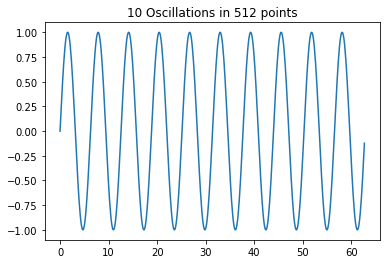

In [2]:
phs = linspace(0, 10 * 2 * pi, 512, endpoint=False)
x = sin(phs)
plot(phs, x)
title('10 Oscillations in 512 points');

Now calculate the Fourier transform for bin $k=1$  :

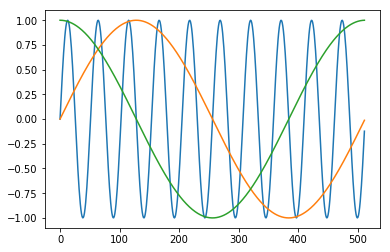

In [3]:
phasor_phs = linspace(0, 2 * pi, 512, endpoint=False)
plot(x)
plot(sin(phasor_phs))
plot(cos(phasor_phs));

for $k= 1\ $
and 
$N=512$

$$X_1 = \sum_{n=0}^{511} x_n \cdot [\cos(2 \pi n / 512) - i \sin(2 \pi n / 512)]$$

-1.7763568394e-15 1.42108547152e-14


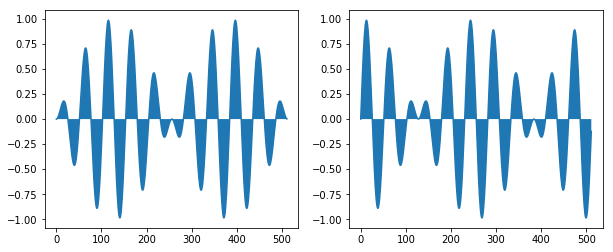

In [4]:
subplot(121)
plot(x*sin(phasor_phs))
fill_between(arange(512), x*sin(phasor_phs))

subplot(122)
plot(x*cos(phasor_phs))
fill_between(arange(512), x*cos(phasor_phs))

gcf().set_figwidth(10)

print(sum(x*sin(phasor_phs)), sum(x*cos(phasor_phs)))

We keep going for all values of $k$, e.g. $k=9$ :


$$X_9 = \sum_{n=0}^{511} x_n \cdot [\cos(2 \pi \cdot 9 \cdot n / 512) - i \sin(2 \pi \cdot 9 \cdot n / 512)]$$

7.1054273576e-15 -2.84217094304e-14


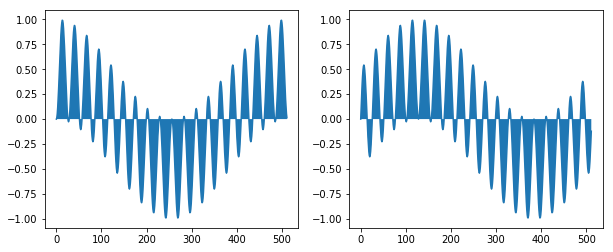

In [5]:
subplot(121)
plot(x*sin(9*phasor_phs))
fill_between(arange(512), x*sin(9*phasor_phs))
subplot(122)
plot(x*cos(9*phasor_phs))
fill_between(arange(512), x*cos(9*phasor_phs))

gcf().set_figwidth(10)

print(sum(x*sin(9*phasor_phs)), sum(x*cos(9*phasor_phs)))

And $k=10\ $    :

256.0 -4.74620343027e-15


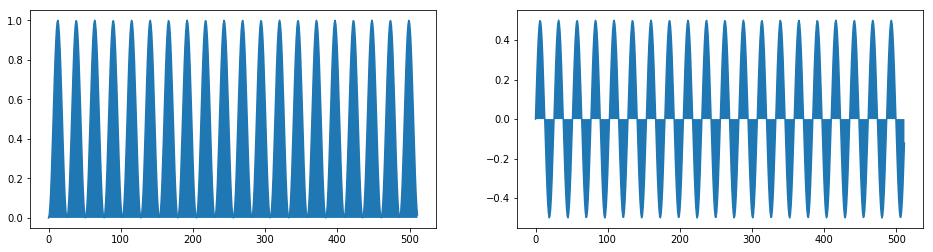

In [6]:
k = 10
subplot(121)
plot(x*sin(k*phasor_phs))
fill_between(arange(512), x*sin(k*phasor_phs))
subplot(122)
plot(x*cos(k*phasor_phs))
fill_between(arange(512), x*cos(k*phasor_phs))

gcf().set_figwidth(16)

print(sum(x*sin(k*phasor_phs)), sum(x*cos(k*phasor_phs)))

Now the whole Fourier transform for all bins $0 < k < N\ \ $:

In [14]:
phs = linspace(0, 10.0 * 2.0 * pi, 512, endpoint=False)
x = sin(phs)
x.dtype

dtype('float64')

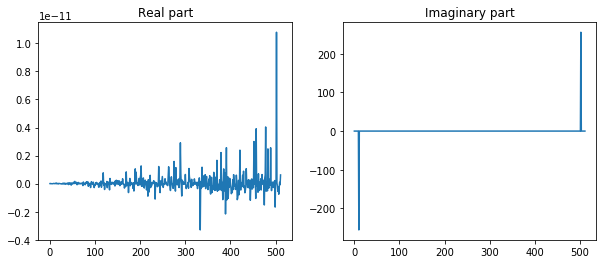

In [15]:
dft = []
for k in range(len(x)):
    bin_phs = linspace(0, k * 2.0 * pi, 512, endpoint=False)
    fft_bin = complex(sum(x*cos(bin_phs)),
                     -sum(x*sin(bin_phs)))
    dft.append(fft_bin)

subplot(121)
plot(real(dft))
title('Real part')

subplot(122)
plot(imag(dft))
title('Imaginary part')

gcf().set_figwidth(10)

The magnitude spectrum is the length of the vector in the complex plain. This function is equivalent to finding the absolute value of the complex number:

$$ Magnitude\ spectrum = |X_n|$$

The phase spectrum is the angle of the vector in the complex plane:

$$Phase\ spectrum = \angle X_n$$

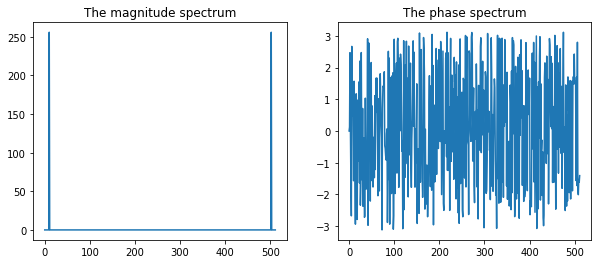

In [16]:
phs = linspace(0, 10.0 * 2.0 * pi, 512)
x = sin(phs)
subplot(121)
plot(abs(array(dft)))
title('The magnitude spectrum')
subplot(122)
plot(angle(array(dft)));
title('The phase spectrum')
gcf().set_figwidth(10)

Using the fft function from the fft module in numpy:

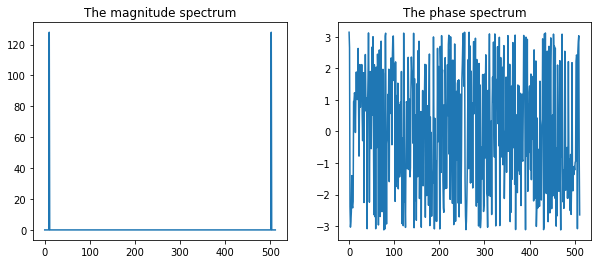

In [17]:
phs = linspace(0, 10.0 * 2.0 * pi, 512, endpoint=False)
x = 0.5 * cos(phs + 0.3 * pi)
subplot(121)
plot(abs(fft.fft(x)))
title('The magnitude spectrum')
subplot(122)
plot(angle(fft.fft(x)));
title('The phase spectrum')
gcf().set_figwidth(10)

In [18]:
fft.fft(x)[10]

(75.23651229343686+103.55417527999305j)

(0, 20)

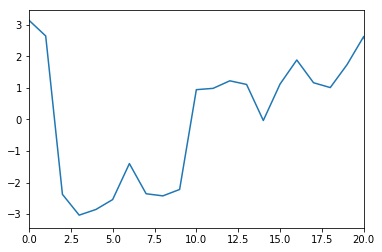

In [19]:
plot(angle(fft.fft(x)));
xlim((0, 20))

In [20]:
angle(fft.fft(x))[10]

0.94247779607693505

In [21]:
0.3 * pi

0.9424777960769379

## Real DFTs

When the input to the DFT is real only (no imaginary part), the second half of the transform is the complex conjugate in reverse. i.e. it mirrors around the center, and the imaginary part changes sign.

You can think of this happening because the FFT harmonic "phasors" wrap around with phase inversion at the Nyquist frequency, which is in the middle of the transform output.


$$X_k = \sum_{n=0}^{N-1} x_n \cdot [\cos(2 \pi k n / N) - i \sin(2 \pi k n / N)]$$

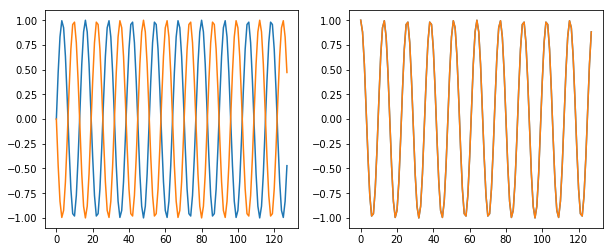

In [22]:
N = 128

k1 = 10
k2 = N - k1

subplot(121)
plot(sin(linspace(0 , 2 * pi * k1, N, endpoint=False)))
plot(sin(linspace(0 , 2 * pi * k2, N, endpoint=False)))
subplot(122)
plot(cos(linspace(0 , 2 * pi * k1, N, endpoint=False)))
plot(cos(linspace(0 , 2 * pi * k2, N, endpoint=False)))

gcf().set_figwidth(10)

The frequencies mirror around after the first half of bins, both in frequency and in phase (phase is inverted)

array([502,  10])

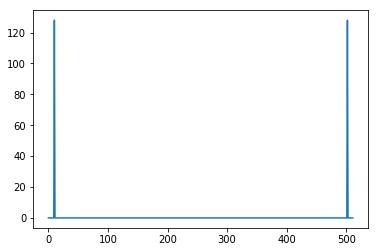

In [23]:
plot(abs(fft.fft(x)))
argsort(abs(fft.fft(x)))[-2:]

The second half of the FFT is the reversed complex conjugate of the first.

This also shows as a reflection of the amplitude spectrum, and a phase reversed and reflected phase spectrum.

This property is called *Hermitian*. i.e. the FFT of a real signal is Hermitian around its center

The transform can be performed more quickly and can take up less memory if this property can be exploited (as in the case of audio signals).

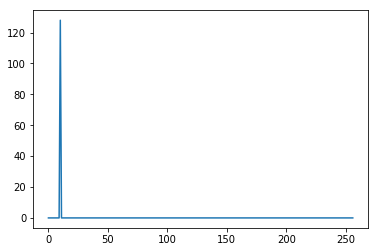

In [24]:
plot(abs(fft.rfft(x)))

Now we only get half the spectrum because we already know the other half.


In [25]:
len(fft.rfft(x))

257

In [26]:
len(x)

512

The number of points we get from the real FFT is $\frac{N}{2} +1$

## Scaling the DFT

Because the DFT adds the multiplication of many points together, the magnitude spectrum needs scaling of the amplitude by $N/2$

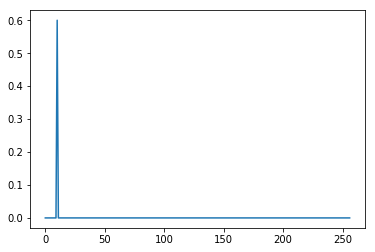

In [27]:
N = 512
phs = linspace(0, 10 * 2 * pi, 512, endpoint=False)
x = 0.6 * sin(phs + 0.3 * pi)

plot(abs(fft.rfft(x))/ (N/2))

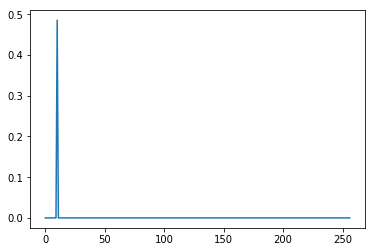

In [28]:
plot(real(fft.rfft(x))/ (N/2))

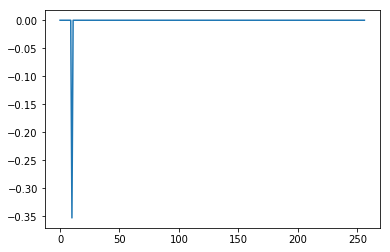

In [29]:
plot(imag(fft.rfft(x))/ (N/2))

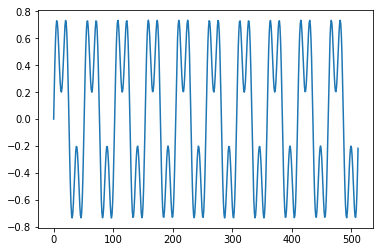

In [30]:
N = 512
phs = linspace(0, 10 * 2 * pi, 512, endpoint=False)
x = 0.6 * sin(phs) + 0.4 * sin(phs*3)

plot(x)

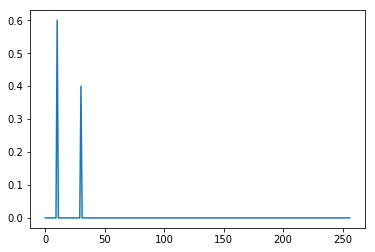

In [31]:
plot(abs(fft.rfft(x))/ (N/2))

But the x scale is not telling us much about frequency...

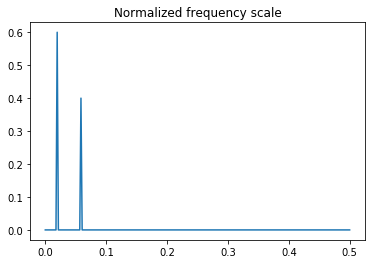

In [32]:
fw = linspace(0, 0.5, 257)
X = abs(fft.rfft(x))/ (N/2)
plot(fw, X)
title('Normalized frequency scale')

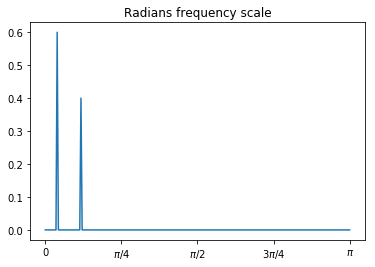

In [33]:
fw = linspace(0, pi, 257)
X = abs(fft.rfft(x))/ (N/2)
plot(fw, X)
xticks(linspace(0, pi, 5), ['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']) ;

title('Radians frequency scale');

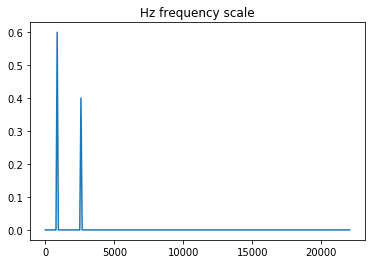

In [34]:
sr = 44100
nyquist = sr/2.0
fw = linspace(0, nyquist, 257, endpoint=True)
X = abs(fft.rfft(x))/ (N/2)
plot(fw, X)
title('Hz frequency scale');

$$f = \frac{f_0  f_s}{N}$$

where $f$ is the "real" frequency, $f_0$ is the number of oscillations within the analysis window, $f_s$ is the sampling rate and $N$ is the size of the window

In [35]:
10.0 * float(sr)/512, 30.0 * float(sr)/512

(861.328125, 2583.984375)

(500, 2700)

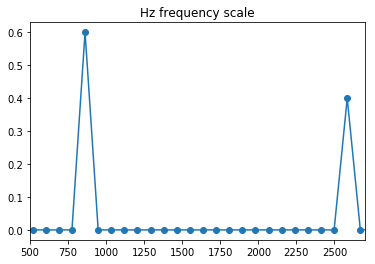

In [36]:
sr = 44100
nyquist = sr/2.0
fw = linspace(0, nyquist, 257)
X = abs(fft.rfft(x))/ (N/2)
plot(fw, X, 'o-')
title('Hz frequency scale');
xlim((500, 2700))

## Power Spectrum

The power spectrum can be computed by squaring the magnitude spectrum:

$$|X_n|^2$$

(500, 2700)

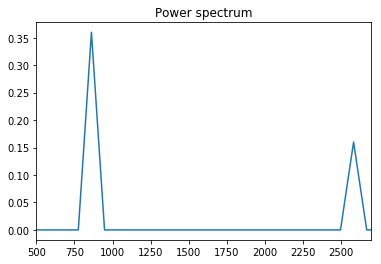

In [37]:
plot(fw, X**2)
title('Power spectrum');
xlim((500, 2700))

This results in a sort of "warping" of the amplitude scale, making peaks more pronounced, and lower level detail less visible. This can be a useful technique when trying to emphasize peaks.

# Fast Fourier Transform

It turns out that the computation of the DFT can be optimized if:
   
* The number of points for the analysis is a power of 2

In [38]:
for i in range(20):
    print(2**i)

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288


# Short-Term Fourier Transform

One of the key assumptions of the DFT is that a signal is static within the analysis frame. (This relates to the assumption of periodicity)

A trick to extract a time-varying spectrum from a signal is to perform short DFTs, each starting a bit later than the previous one.

In [39]:
from scipy.io import wavfile
sr, signal = wavfile.read('media/passport.wav')

In [41]:
!afplay media/passport.wav

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


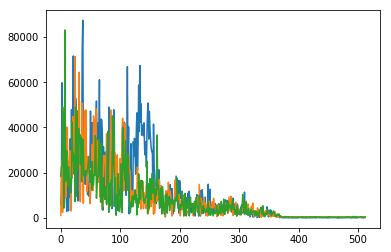

In [42]:
win1 = signal[0:1024]
win2 = signal[1024:2048]
win3 = signal[2048: 3072]

plot(abs(fft.rfft(win1)))
plot(abs(fft.rfft(win2)))
plot(abs(fft.rfft(win3)))

In [43]:
arange(0, 40000, 2048)

array([    0,  2048,  4096,  6144,  8192, 10240, 12288, 14336, 16384,
       18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 34816,
       36864, 38912])

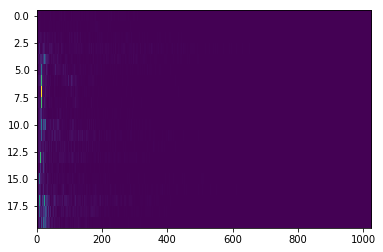

In [45]:
win_start = arange(0, 40000, 2048)
win_len = 2048

mag_spectrum = []

for start in win_start:
    win = signal[start: start + win_len]
    X = fft.rfft(win)
    mag_spectrum.append(abs(X)/float(win_len/2))

imshow(mag_spectrum, aspect='auto')

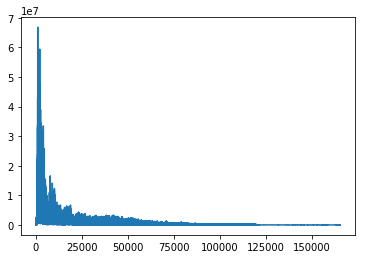

In [46]:
plot(abs(fft.rfft(signal)))

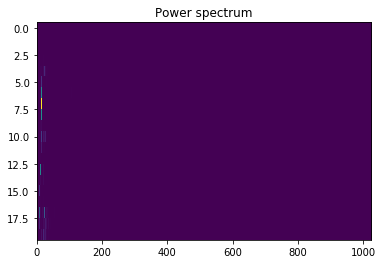

In [47]:
win_start = arange(0, 40000, 2048)
win_len = 2048

pow_spectrum = []

for start in win_start:
    win = signal[start: start + win_len]
    X = fft.rfft(win)
    pow_spectrum.append(abs(X)**2/float(win_len/2))

imshow(pow_spectrum, aspect='auto')
title('Power spectrum')


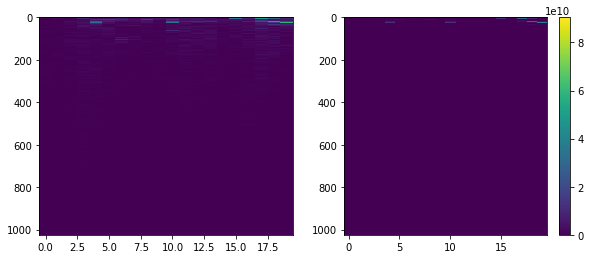

In [48]:
subplot(121)
imshow(array(mag_spectrum).T, aspect='auto')
subplot(122)
imshow(array(pow_spectrum).T, aspect='auto')

gcf().set_figwidth(10)
colorbar()

In [49]:
array(mag_spectrum).shape

(20, 1025)

## Spectrogram

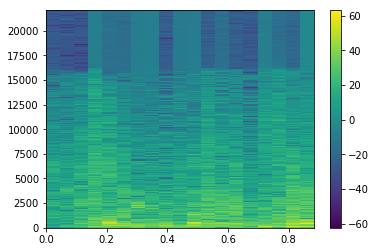

In [50]:
sout = specgram(signal[:40000], NFFT=2048, noverlap=0, window=window_none, Fs=sr);

sout[0].shape, sout[1].shape, sout[2].shape
colorbar();

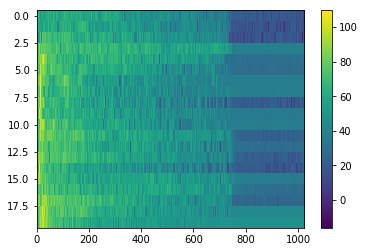

In [51]:
imshow(10*log10(pow_spectrum), aspect='auto')
colorbar()

(0, 1024)

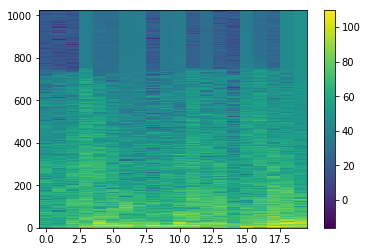

In [52]:
imshow(10*log10(pow_spectrum).T, aspect='auto', interpolation='nearest')
colorbar()
ylim((0, 1024))

So the *specgram* function in pylab plots the Power spectrum on a decibel scale. The decibel scale is more useful than the linear scale as the relative amplitudes can be detected better.

# Windowed analysis

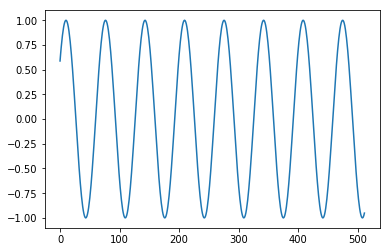

In [53]:
N = 512
phs = linspace(0.2* pi, 7.8 * 2 * pi, N)
x = sin(phs)
plot(x)

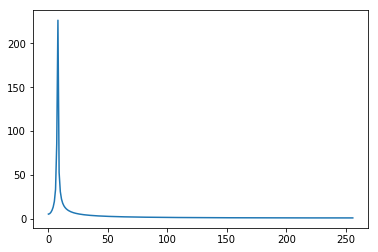

In [54]:
X = fft.rfft(x)
plot(abs(X))

(0, 20)

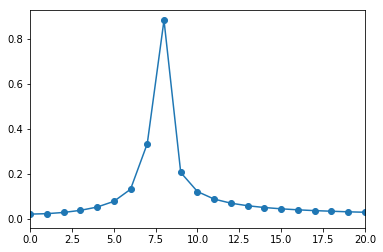

In [57]:
plot(abs(X)/len(X), 'o-')
xlim((0, 20))

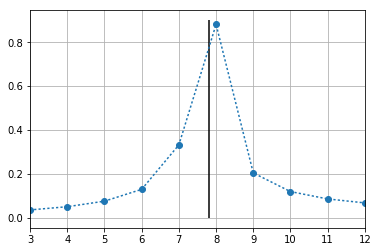

In [58]:
plot(abs(X)/len(X), 'o:')
xlim((3, 12))
grid()
vlines(7.8, 0, 0.9)

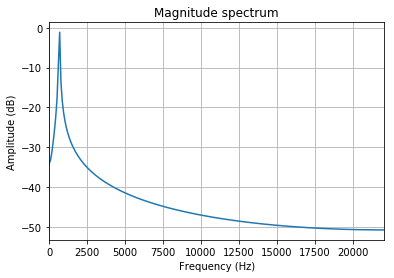

In [60]:
def plot_mag_spectrum(x, sr=44100, db=True):
    X = fft.rfft(x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,20*log10(abs(X)/len(X)))  # assumes real FFT
    else:
        plot(fw,abs(X)/len(X))  # assumes real FFT
    ylabel('Amplitude (dB)'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)
    
plot_mag_spectrum(x)

(0, 2500)

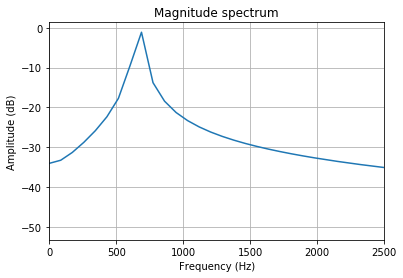

In [61]:
plot_mag_spectrum(x )
xlim(0, 2500)

Why is there energy/amplitude around the center frequency, when only a single frequency was present?

## Effect of analysis windows

(-200, 0)

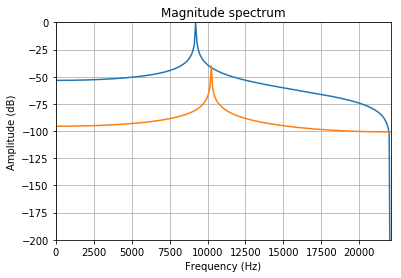

In [62]:
N = 512
phs = linspace(0.6* pi, 107.2 * 2 * pi, N)
x = sin(phs)
plot_mag_spectrum(x)

x = 0.01 * sin(phs * 1.11)
plot_mag_spectrum(x)

ylim((-200, 0))


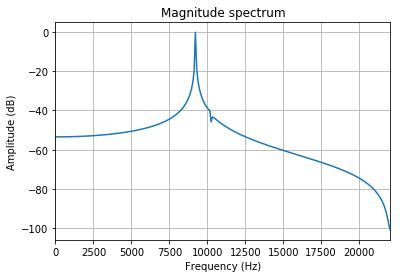

In [63]:
N = 512
phs = linspace(0.6* pi, 107.2 * 2 * pi, N)
x = sin(phs) + (0.01 * sin(phs * 1.11))
plot_mag_spectrum(x)

Which are true components of the signal?

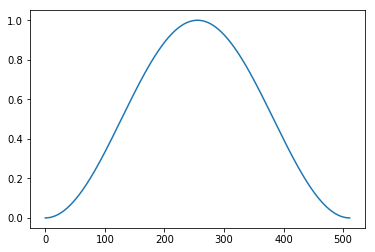

In [64]:
plot(hanning(N));

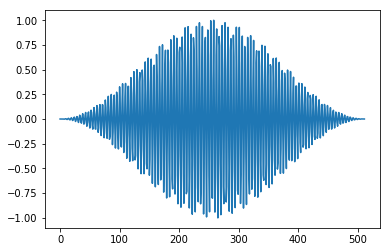

In [65]:
plot(hanning(N) * x);

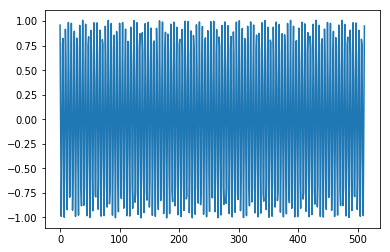

In [66]:
plot(x)

(0, 100)

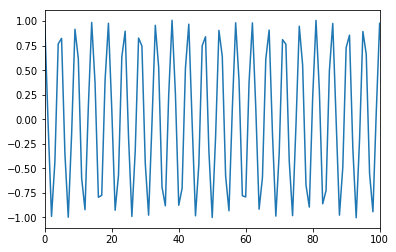

In [67]:
plot(x)
xlim((0, 100))

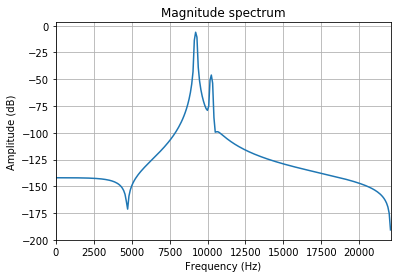

In [68]:
plot_mag_spectrum(hanning(N) * x)

Ah! Much better!

But wait, isn't amplitude wrong? It doesn't match the amplitude values when not using a window...

In [69]:
def plot_mag_spectrum(x, sr=44100, db=True, window=window_none):
    w = window(len(x))
    X = fft.rfft(window(len(x)) *x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,20*log10(abs(X)/(sum(w)/2.0)))  # assumes real FFT
    else:
        plot(fw,abs(X)/(sum(w)/2.0))  # assumes real FFT
    ylabel('Amplitude'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)

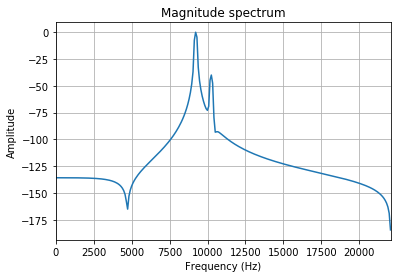

In [70]:
plot_mag_spectrum(x, window=hanning)

Windowing the analysis frame results in a tradeoff between main lobe width and sidelobe (leakage) level.

http://en.wikipedia.org/wiki/Windowing_function

There are many different functions which can be useful for different applications. In audio the most common are Hann (Hanning), Hamming, Kaiser and Bartlett, because they have lower sidelobe levels.

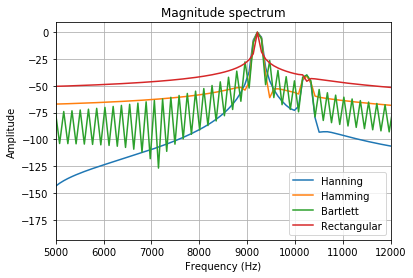

In [71]:
plot_mag_spectrum(x, window=hanning)
plot_mag_spectrum(x, window=hamming)
plot_mag_spectrum(x, window=bartlett)
plot_mag_spectrum(x, window=ones)

xlim((5000, 12000))
legend(['Hanning', 'Hamming', 'Bartlett', 'Rectangular'], loc='best')

## Zero padding

Zero padding consists of adding zeros at the end of an analysis frame, to improve smoothness of the spectrum or to adjust to make the window size a power of two.

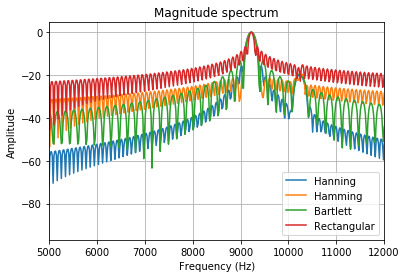

In [72]:
def plot_mag_spectrum(x, sr=44100, db=True, window=window_none, zp=0):
    w = window(len(x))
    padded_x = r_[window(len(x)) *x, zeros(zp)]
    X = fft.rfft(padded_x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,10*log10(abs(X)/(sum(w)/2.0)))  # assumes real FFT
    else:
        plot(fw,abs(X)/(sum(w)/2.0))  # assumes real FFT
    ylabel('Amplitude'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)

plot_mag_spectrum(x, window=hanning, zp=2048)
plot_mag_spectrum(x, window=hamming, zp=2048)
plot_mag_spectrum(x, window=bartlett, zp=2048)
plot_mag_spectrum(x, window=ones, zp=2048)

xlim((5000, 12000))
legend(['Hanning', 'Hamming', 'Bartlett', 'Rectangular'], loc='best')

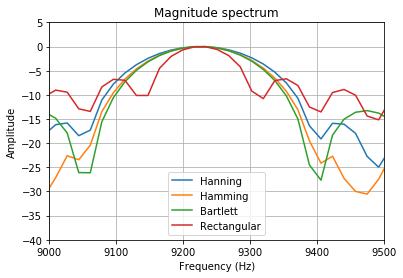

In [73]:
plot_mag_spectrum(x, window=hanning, zp=2048)
plot_mag_spectrum(x, window=hamming, zp=2048)
plot_mag_spectrum(x, window=bartlett, zp=2048)
plot_mag_spectrum(x, window=ones, zp=2048)

xlim((9000, 9500))
ylim((-40, 5))
legend(['Hanning', 'Hamming', 'Bartlett', 'Rectangular'], loc='lower center')

Zero padding is actually similar to interpolating the spectrum, it doesn't really give better frequency resolution.

But it can reveal artifacts, so it is more like upsampling.

## Spectrogram (again)

Because windowing makes the spectrum focus on the center of the window, it is common to overlap windows

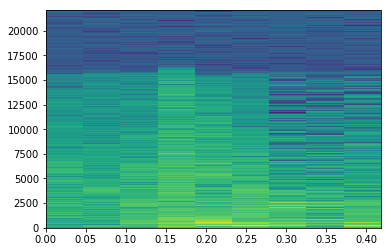

In [91]:
sout = specgram(signal[:20000], NFFT=2048, noverlap=0, Fs=sr);

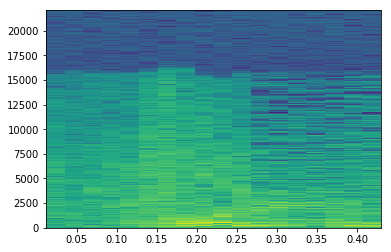

In [92]:
sout = specgram(signal[:20000], NFFT=2048, noverlap=1024, Fs=sr);

# The Inverse Fourier Transform

The Inverse Fourier transform can reconstruct the time domain representation of a frequency domain spectrum.


$$s(t) = \int_{-\infty}^{\infty} S(f) \cdot e^{i 2\pi f t} df$$

The only change in practice is the sign of the exponent!

In [78]:
mag_spec = [0, 1,0,0,0,0,0,0,0]
phs_spec = [0, 0, 0,0,0,0,0,0,0]

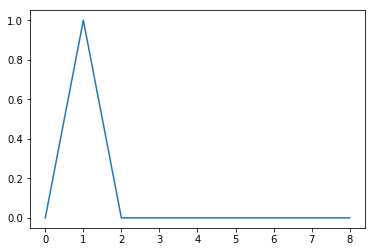

In [79]:
X = [np.complex(cos(phs)* mag, sin(phs)* mag) for mag, phs in zip(mag_spec, phs_spec)]
plot(real(X))

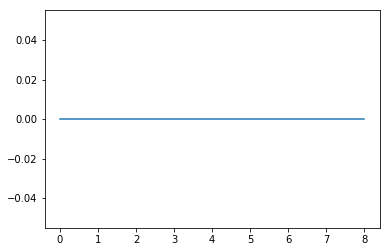

In [80]:
plot(imag(X))

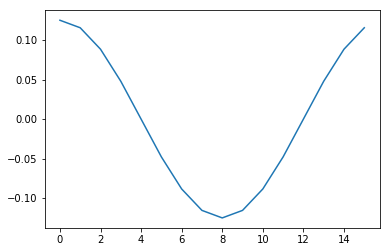

In [81]:
x = fft.irfft(X)
plot(x)

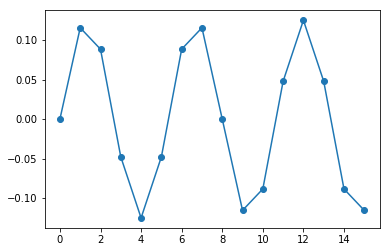

In [82]:
mag_spec = [0,0,0,1,0,0,0,0,0]
phs_spec = [0, 0, 0, pi/2,0,0,0,0,0]
X = [np.complex(cos(phs)* mag, -sin(phs)* mag) for mag, phs in zip(mag_spec, phs_spec)]
x = fft.irfft(X)
plot(x, 'o-')

The inverse FT must be scaled.

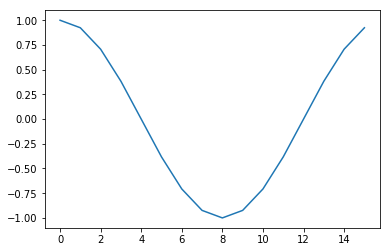

In [83]:
mag_spec = [0,1,0,0,0,0,0,0, 0]
phs_spec = [0, 0, 0,0,0,0,0,0, 0]
X = [np.complex(cos(phs)* mag, sin(phs)* mag) for mag, phs in zip(mag_spec, phs_spec)]
x = fft.irfft(X) * 8
plot(x)

In [84]:
mag_spec = [0] + ([0,0,0,0,0,0,1] * 4)
print(len(mag_spec))
mag_spec += [0]

29


In [85]:
phs_spec = ones(29) * pi/2
X = [np.complex(cos(phs)* mag, -sin(phs)* mag) for mag, phs in zip(mag_spec, phs_spec)]

In [86]:
type([0,0,0,0,0,0,1])

list

In [87]:
type(ones(29))

numpy.ndarray

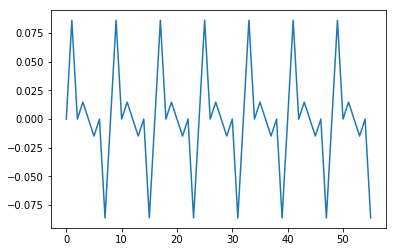

In [88]:
x = fft.irfft(X)
plot(x)

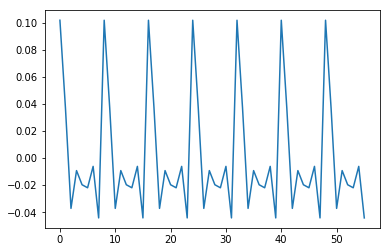

In [89]:
phs_spec = linspace(0, 1, 29)
X = [np.complex(cos(phs)* mag, -sin(phs)* mag) for mag, phs in zip(mag_spec, phs_spec)]
x = fft.irfft(X)
plot(x)

By: Andrés Cabrera mantaraya36@gmail.com
For MAT course MAT 201A at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)